In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from datasets.nuscenes import compile_data
from datasets.nuscenes_ood import compile_data as compile_data_ood
from models.baseline import *
from models.evidential import *

import tools.loss

from time import time

In [4]:
num_workers = [1, 2, 4, 8, 16, 32, 64]
split = 'mini'
DATAROOT = "../../data/nuscenes"

In [24]:
tl, vl = compile_data(split, DATAROOT, num_workers=32, batch_size=2)

In [6]:
images, intrinsics, extrinsics, labels = tl.dataset[100]

In [7]:
from tools.utils import *
%matplotlib inline
import matplotlib.pyplot as plt

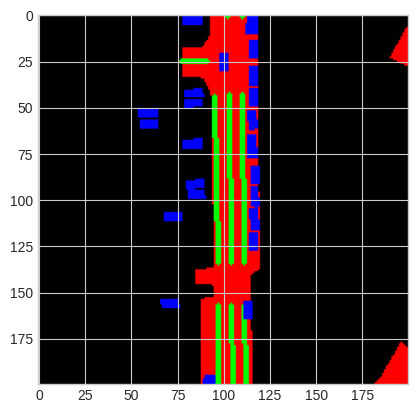

In [8]:
plt.imshow(map_rgb(torch.tensor(labels)) / 255)

In [9]:
model = Baseline([7], loss_type='focal')
model.load(torch.load("../nuscenes/fiery_baseline/9.pt"))

Loaded pretrained weights for efficientnet-b4


In [26]:
for images, intrinsics, extrinsics, labels in vl:
    print(labels.shape)
    break

outs = model(images, intrinsics, extrinsics)

torch.Size([2, 4, 200, 200])


In [27]:
preds = model.activate(outs)

In [37]:
model.loss_type = 'focal'
model.loss(outs, labels.to(7))

torch.Size([2, 4, 200, 200])


tensor(0.7043, device='cuda:7', dtype=torch.float64, grad_fn=<MeanBackward0>)

In [ ]:
import torch.nn.functional as F

In [19]:
outs = outs.detach().cpu()
outs.device

device(type='cpu')

In [21]:
tl = torch.tensor(labels[None])
tl.device

device(type='cpu')

In [27]:
F.cross_entropy(outs, tl)

tensor(1.3922, dtype=torch.float64)

In [25]:
tl.shape
artl = tl.argmax(dim=1)
artl.shape

torch.Size([1, 200, 200])

In [29]:
gamma(torch.tensor([0]))

tensor([inf])

RuntimeError: The size of tensor a (200) must match the size of tensor b (4) at non-singleton dimension 3